In [1]:
from spaces import *
import numpy as np
from model.player import Player, distance

In [2]:
statespace = Space(name="statespace")

In [3]:
statespace.append_dimension("Alice", Player)
statespace.append_dimension("Bob", Player)

In [4]:
statespace.dimensions

['Alice', 'Bob']

In [5]:
state = statespace.point({"Alice":(0,0),"Bob":(1,1)})

In [6]:
state.Alice.x, state.Alice.y, state.Bob.x, state.Bob.y

(0, 0, 1, 1)

In [7]:
traj = Trajectory(state)

In [8]:
traj.space.name

'statespace'

In [9]:
for p in traj.points:
    print((p.Alice.x,p.Alice.y))
    print((p.Bob.x,p.Bob.y))

(0, 0)
(1, 1)


In [10]:
def tag_dynamics(point):
    
    point.Alice.chase(point.Bob)
    point.Bob.evade(point.Alice)

    return point


In [11]:
dyn = Dynamics(statespace, step=tag_dynamics)
traj.set_dynamics(dyn)

In [12]:
traj.dynamics.step

<function __main__.tag_dynamics(point)>

In [13]:
traj.points

In [14]:
traj.apply_dynamics(10)

In [15]:
traj.points

In [16]:
import matplotlib.pyplot as plt

In [17]:
t = range(traj.length)
alice_pos = [(p.Alice.x,p.Alice.y) for p in traj.points ]
bob_pos = [(p.Bob.x,p.Bob.y) for p in traj.points ]

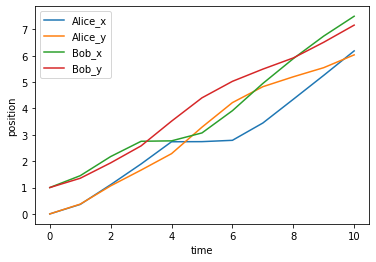

In [18]:
plt.plot(t,alice_pos, t, bob_pos)
plt.xlabel("time")
plt.ylabel("position")
plt.legend(["Alice_x", "Alice_y","Bob_x","Bob_y"])

In [19]:
state = traj.points[-1]

In [20]:
state.Alice.x, state.Alice.y, state.Bob.x, state.Bob.y

(6.185334973617222, 6.03458975303575, 7.500147906278893, 7.1629139355383735)

In [21]:
statespace.metrics

[]

In [22]:
dist = Metric(lambda point: distance(point.Alice, point.Bob), description="2d Euclidean Distance")
statespace.append_metric("distance", dist)

In [23]:
statespace.metrics

['distance']

In [24]:
statespace.distance.eval(state)

1.7325843438963076

In [25]:
distances = [ traj.space.distance.eval(p) for p in traj.points ]

Text(0.5, 1.0, 'Distance Between Alice and Bob')

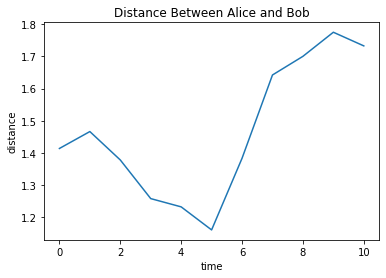

In [26]:
plt.plot(t, distances)
plt.xlabel("time")
plt.ylabel("distance")
plt.title("Distance Between Alice and Bob")

In [27]:
def unit_vector(point):
    
    s = point.space
    d = point.space.distance.eval(point)

    if d < .000001:
        return (0,0)
    else:
        dx = point.Bob.x-point.Alice.x
        dy = point.Bob.y-point.Alice.y
    
        return [dx/d,dy/d]


dire = Metric(unit_vector, description="Unit Vector Alice to Bob")

In [28]:
statespace.append_metric("direction", dire)

In [29]:
directions = np.array([ traj.space.direction.eval(p) for p in traj.points ])

In [30]:
directions

array([[0.70710678, 0.70710678],
       [0.74321168, 0.66905635],
       [0.77443725, 0.63265073],
       [0.68355705, 0.72989709],
       [0.02791184, 0.99961039],
       [0.28480028, 0.95858688],
       [0.81222403, 0.58334564],
       [0.91384178, 0.40607043],
       [0.90712735, 0.42085623],
       [0.83956245, 0.54326318],
       [0.75887384, 0.65123766]])

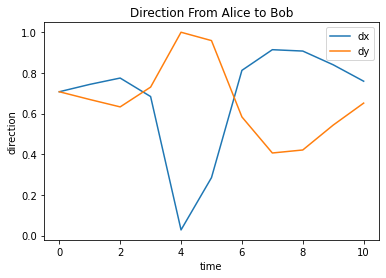

In [31]:
plt.plot(directions)
plt.xlabel("time")
plt.ylabel("direction")
plt.title("Direction From Alice to Bob")
plt.legend(["dx","dy"])

Text(0.5, 1.0, 'Direction From Alice to Bob')

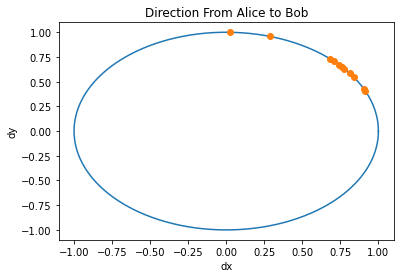

In [32]:
xc=[]
yc=[]

for theta in np.arange(0,2*np.pi,.01):
    xc.append(np.cos(theta))
    yc.append(np.sin(theta))

plt.plot(xc,yc)
plt.plot(directions.T[0], directions.T[1], 'o')
plt.xlabel("dx")
plt.ylabel("dy")
plt.title("Direction From Alice to Bob")